In [1]:
import pandas as pd
import numpy as np

# data preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# exploratory analysis
import matplotlib.pyplot as plt
import mlxtend
from mlxtend.plotting import scatterplotmatrix
from mlxtend.plotting import heatmap
import seaborn as sns
from IPython.display import Image

# model fit
import statsmodels.api as sm
import tensorflow as tf

# ignore warnings (libraries are rapidly changing)
import warnings
warnings.filterwarnings('ignore')

2023-12-02 22:29:37.124043: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
train = pd.read_csv('train_data.csv')
val = pd.read_csv('val_data.csv')

In [3]:
train.shape

(4681, 48)

In [4]:
val.shape

(570, 48)

In [5]:
df = pd.concat([train, val])
df

,area,region,sub-region,year,urban_population,mei,crop_residues,rice_cultivation,drained_organic_soils_co2,forestland,...,cum_sum_log_drained_organic_soils_co2,cum_sum_log_net_forest_conversion,cum_sum_log_fires,cum_sum_log_manure_mgmt,cum_sum_log_food_systems,cum_sum_log_ippu_tot,cum_sum_log_on_farm_energy_use,cum_sum_forestland,cum_sum_total_emission,average_temperature_°c
0,Afghanistan,Asia,Southern Asia,1990,-0.248427,0.200000,-0.207344,-0.200288,-0.241248,0.216313,...,-0.726651,-0.863273,-0.803507,-1.341128,-1.518110,-1.579650,-1.217366,0.228626,-0.283573,0.536167
1,Albania,Europe,Southern Europe,1990,-0.270189,0.200000,-0.250166,-0.234801,-0.234608,0.245278,...,-0.650712,-0.863273,-0.806118,-1.353112,-1.528564,-1.554559,-1.275860,0.230803,-0.283139,0.735750
2,Algeria,Africa,Northern Africa,1990,-0.078775,0.200000,-0.219436,-0.235802,-0.241248,0.243113,...,-0.726651,-0.772093,-0.764806,-1.337138,-1.481105,-1.529818,-1.293127,0.230641,-0.276729,1.005583
3,Andorra,Europe,Southern Europe,1990,-0.287987,0.200000,-0.132015,-0.187767,-0.241248,0.244421,...,-0.726651,-0.863273,-0.851537,-1.325553,-1.530632,-1.547863,-1.304697,0.230739,-0.282425,1.278500
4,Angola,Africa,Sub-Saharan Africa,1990,-0.218440,0.200000,-0.258033,-0.234738,-0.220441,0.244421,...,-0.632413,-0.734895,-0.661346,-1.344838,-1.512544,-1.565645,-1.320237,0.230739,-0.260562,0.676667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,Venezuela (Bolivarian Republic of),Americas,Latin America and the Caribbean,2017,0.149994,-0.533333,-0.235477,-0.174028,-0.153827,0.255691,...,2.423320,3.644642,2.967487,2.730373,2.610903,2.621934,1.885658,0.266139,1.175092,0.729250
566,Viet Nam,Asia,South-eastern Asia,2017,0.234710,-0.533333,0.516860,1.748631,-0.011865,0.040361,...,3.007630,-0.294956,2.738105,2.785640,2.734825,2.494317,2.475598,-0.580475,0.307354,0.986000
567,Yemen,Asia,Western Asia,2017,-0.130466,-0.533333,-0.256207,-0.194547,-0.241248,0.244421,...,-0.726651,-0.863273,-0.847428,2.138345,2.169105,1.694474,2.370580,0.230739,-0.166947,1.282959
568,Zambia,Africa,Sub-Saharan Africa,2017,-0.174475,-0.533333,-0.203589,-0.233006,0.626930,0.244421,...,3.594301,2.502666,4.392999,1.985668,1.732509,1.558316,0.689210,0.230739,0.440784,0.103500


In [6]:
df.columns

Index(['area', 'region', 'sub-region', 'year', 'urban_population', 'mei',
       'crop_residues', 'rice_cultivation', 'drained_organic_soils_co2',
       'forestland', 'net_forest_conversion', 'fires', 'manure_mgmt',
       'food_systems', 'ippu_tot', 'on_farm_energy_use', 'total_emission',
       'log_urban_population', 'log_crop_residues', 'log_rice_cultivation',
       'log_drained_organic_soils_co2', 'log_net_forest_conversion',
       'log_fires', 'log_manure_mgmt', 'log_food_systems', 'log_ippu_tot',
       'log_on_farm_energy_use', 'cum_sum_crop_residues',
       'cum_sum_rice_cultivation', 'cum_sum_drained_organic_soils_co2',
       'cum_sum_net_forest_conversion', 'cum_sum_fires', 'cum_sum_manure_mgmt',
       'cum_sum_food_systems', 'cum_sum_ippu_tot',
       'cum_sum_on_farm_energy_use', 'cum_sum_log_crop_residues',
       'cum_sum_log_rice_cultivation', 'cum_sum_log_drained_organic_soils_co2',
       'cum_sum_log_net_forest_conversion', 'cum_sum_log_fires',
       'cum_sum_

In [7]:
features = ['area', 'region', 'sub-region', 'year', 'urban_population', 'mei',
       'crop_residues', 'rice_cultivation', 'drained_organic_soils_co2',
       'forestland', 'net_forest_conversion', 'fires', 'manure_mgmt',
       'food_systems', 'ippu_tot', 'on_farm_energy_use', 'total_emission',
       'average_temperature_°c']

In [8]:
print(train['average_temperature_°c'].mean())
print(val['average_temperature_°c'].mean())
print(df['average_temperature_°c'].mean())

0.7521813428923511
1.3417993044298606
0.8161848161500888


In [9]:
train[features].describe()

,year,urban_population,mei,crop_residues,rice_cultivation,drained_organic_soils_co2,forestland,net_forest_conversion,fires,manure_mgmt,food_systems,ippu_tot,on_farm_energy_use,total_emission,average_temperature_°c
count,4681.000000,4681.000000,4681.000000,4.681000e+03,4.681000e+03,4.681000e+03,4.681000e+03,4.681000e+03,4.681000e+03,4.681000e+03,4.681000e+03,4.681000e+03,4.681000e+03,4.681000e+03,4681.000000
mean,2002.151677,0.000000,-0.111071,-7.589647e-18,3.358419e-17,6.830682e-18,-5.198908e-17,3.035859e-17,-3.794823e-18,3.491238e-17,2.125101e-17,2.428687e-17,5.085063e-17,1.517929e-17,0.752181
std,7.148969,1.000107,0.685475,1.000107e+00,1.000107e+00,1.000107e+00,1.000107e+00,1.000107e+00,1.000107e+00,1.000107e+00,1.000107e+00,1.000107e+00,1.000107e+00,1.000107e+00,0.504830
min,1990.000000,-0.288781,-1.375000,-2.674978e-01,-2.360262e-01,-2.412484e-01,-9.135752e+00,-1.821343e-01,-1.622997e-01,-3.505988e-01,-2.600461e-01,-2.034614e-01,-2.537636e-01,-2.037537e+00,-1.302417
25%,1996.000000,-0.278465,-0.566667,-2.646443e-01,-2.303652e-01,-2.412484e-01,1.883980e-01,-1.821343e-01,-1.622932e-01,-3.376526e-01,-2.524533e-01,-1.941870e-01,-2.513907e-01,-2.871545e-01,0.437000
50%,2002.000000,-0.241499,-0.041667,-2.382966e-01,-2.222154e-01,-2.411992e-01,2.424216e-01,-1.803067e-01,-1.616703e-01,-2.747733e-01,-2.271288e-01,-1.771542e-01,-2.316221e-01,-2.508358e-01,0.723833
75%,2008.000000,-0.127681,0.200000,-1.674581e-01,-1.758358e-01,-1.761455e-01,2.444209e-01,-1.249206e-01,-1.273963e-01,-8.740438e-02,-1.533784e-01,-1.329838e-01,-1.518276e-01,-1.027652e-01,1.041333
max,2014.000000,11.847837,1.191667,8.696307e+00,8.355556e+00,1.369773e+01,2.257942e+00,1.393033e+01,3.795467e+01,7.776159e+00,1.324201e+01,1.672984e+01,1.006421e+01,1.179098e+01,3.080333


In [10]:
val[features].describe()

,year,urban_population,mei,crop_residues,rice_cultivation,drained_organic_soils_co2,forestland,net_forest_conversion,fires,manure_mgmt,food_systems,ippu_tot,on_farm_energy_use,total_emission,average_temperature_°c
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000
mean,2016.000000,0.101711,0.400000,0.072096,0.005158,0.013306,-0.000846,-0.040944,-0.015658,0.032912,0.086811,0.133708,0.035277,0.082106,1.341799
std,0.817214,1.429484,0.740050,1.268564,1.009643,1.122081,1.106332,0.624681,0.932970,1.044044,1.455128,1.727345,1.246003,1.372336,0.414263
min,2015.000000,-0.288779,-0.533333,-0.267498,-0.236026,-0.241248,-8.358284,-0.182134,-0.162300,-0.350584,-0.259870,-0.202268,-0.253692,-1.422196,-0.403167
25%,2015.000000,-0.272271,-0.533333,-0.264577,-0.228171,-0.241248,0.206040,-0.182134,-0.162300,-0.335258,-0.248466,-0.191334,-0.249515,-0.285405,1.076688
50%,2016.000000,-0.223498,0.458333,-0.230150,-0.213689,-0.241142,0.243336,-0.180503,-0.161914,-0.262455,-0.215138,-0.172568,-0.223541,-0.237042,1.314750
75%,2017.000000,-0.052501,1.275000,-0.134477,-0.170846,-0.175164,0.244421,-0.130969,-0.135090,-0.043512,-0.133696,-0.086172,-0.150762,-0.064132,1.604896
max,2017.000000,12.833766,1.275000,9.499204,7.717518,13.951748,1.144573,6.683742,20.007906,7.289113,13.668726,16.491985,10.824352,12.246295,2.795083


In [11]:
df[features].describe()

,year,urban_population,mei,crop_residues,rice_cultivation,drained_organic_soils_co2,forestland,net_forest_conversion,fires,manure_mgmt,food_systems,ippu_tot,on_farm_energy_use,total_emission,average_temperature_°c
count,5251.000000,5251.000000,5251.000000,5251.000000,5251.000000,5251.000000,5251.000000,5251.000000,5251.000000,5251.000000,5251.000000,5251.000000,5251.000000,5251.000000,5251.000000
mean,2003.654923,0.011041,-0.055594,0.007826,0.000560,0.001444,-0.000092,-0.004444,-0.001700,0.003573,0.009423,0.014514,0.003829,0.008913,0.816185
std,8.012023,1.055504,0.709576,1.032732,1.001051,1.013950,1.012064,0.966475,0.992966,1.004919,1.059167,1.103054,1.029565,1.047085,0.528612
min,1990.000000,-0.288781,-1.375000,-0.267498,-0.236026,-0.241248,-9.135752,-0.182134,-0.162300,-0.350599,-0.260046,-0.203461,-0.253764,-2.037537,-1.302417
25%,1997.000000,-0.278063,-0.566667,-0.264634,-0.230148,-0.241248,0.190070,-0.182134,-0.162294,-0.337469,-0.252086,-0.194010,-0.251205,-0.287008,0.475208
50%,2004.000000,-0.239582,-0.041667,-0.237530,-0.221552,-0.241199,0.242461,-0.180307,-0.161697,-0.273295,-0.226268,-0.176627,-0.230932,-0.250028,0.787417
75%,2011.000000,-0.122930,0.266667,-0.164599,-0.174870,-0.175560,0.244421,-0.124931,-0.128129,-0.081650,-0.150858,-0.128474,-0.151794,-0.099885,1.140458
max,2017.000000,12.833766,1.275000,9.499204,8.355556,13.951748,2.257942,13.930328,37.954675,7.776159,13.668726,16.729837,10.824352,12.246295,3.080333


In [12]:
# create grouped dataset for multiline plot
avg_temp_by_year = df.groupby(['region','year'])[['cum_sum_total_emission', 'average_temperature_°c']].mean().reset_index()
avg_temp_by_year


,region,year,cum_sum_total_emission,average_temperature_°c
0,Africa,1990,-0.272586,0.558282
1,Africa,1991,-0.260790,0.308779
2,Africa,1992,-0.248955,0.300477
3,Africa,1993,-0.238045,0.416116
4,Africa,1994,-0.226353,0.343974
...,...,...,...,...
135,Oceania,2013,-0.136080,0.789418
136,Oceania,2014,-0.131277,0.689200
137,Oceania,2015,-0.126484,0.649649
138,Oceania,2016,-0.120148,1.121351


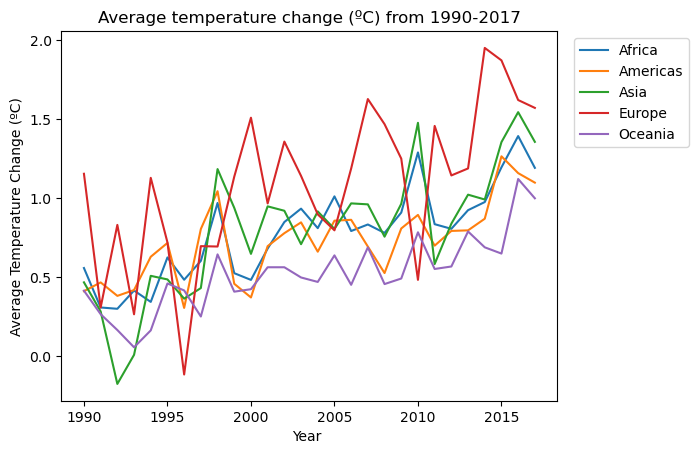

In [13]:
# create sns line plot

sns.lineplot(x=avg_temp_by_year['year'], y=avg_temp_by_year['average_temperature_°c'], hue='region', data=avg_temp_by_year)

plt.xlabel('Year ')
plt.ylabel('Average Temperature Change (ºC)')
plt.title('Average temperature change (ºC) from 1990-2017')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')


plt.show()

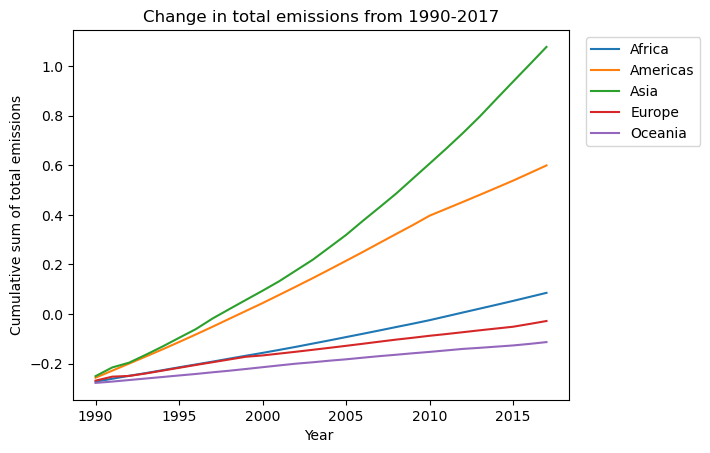

In [14]:
# create sns line plot

sns.lineplot(x=avg_temp_by_year['year'], y=avg_temp_by_year['cum_sum_total_emission'], hue='region', data=avg_temp_by_year)

plt.xlabel('Year ')
plt.ylabel('Cumulative sum of total emissions')
plt.title('Change in total emissions from 1990-2017')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')


plt.show()

In [15]:
reg_subreg = df.groupby(['region','sub-region'])['area'].count().reset_index()
reg_subreg

,region,sub-region,area
0,Africa,Northern Africa,140
1,Africa,Sub-Saharan Africa,1285
2,Americas,Latin America and the Caribbean,980
3,Americas,Northern America,56
4,Asia,Central Asia,130
5,Asia,Eastern Asia,196
6,Asia,South-eastern Asia,308
7,Asia,Southern Asia,252
8,Asia,Western Asia,414
9,Europe,Eastern Europe,266


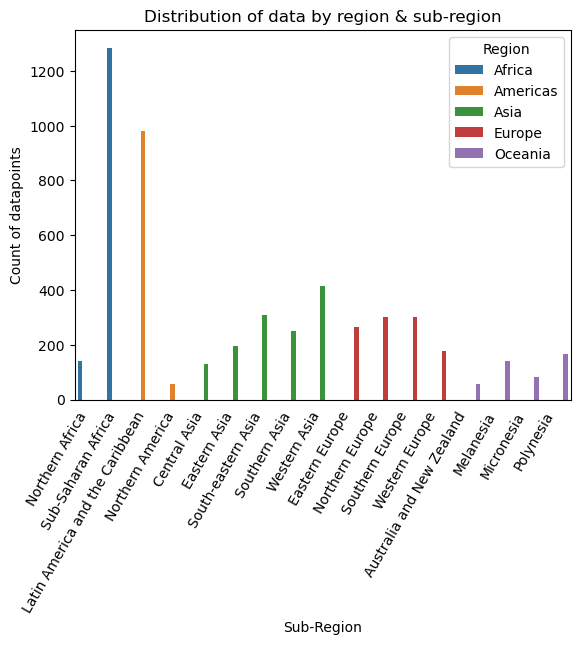

In [16]:
reg_barplot = sns.barplot(x='sub-region', y='area', hue='region', data=reg_subreg)
reg_barplot.set_xticklabels(reg_barplot.get_xticklabels(), rotation=60, ha='right')
plt.ylabel('Count of datapoints')
plt.xlabel('Sub-Region')
plt.title('Distribution of data by region & sub-region')
plt.legend(title='Region')
# Remove x-axis dashes
plt.tick_params(axis='x', which='both', bottom=False)

# Show the plot
plt.show()

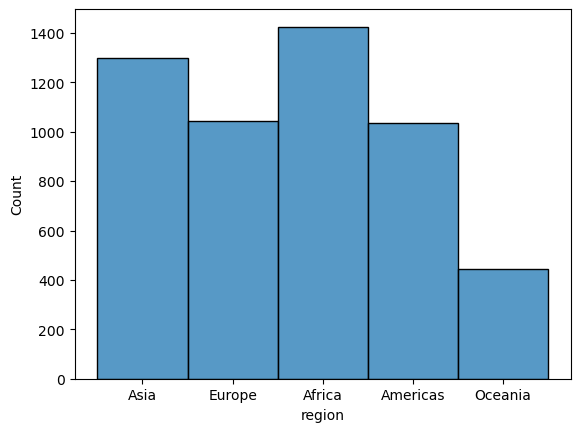

In [17]:
# check remaining region & sub-region distribution
sns.histplot(data=df['region'], discrete=True)
plt.show()

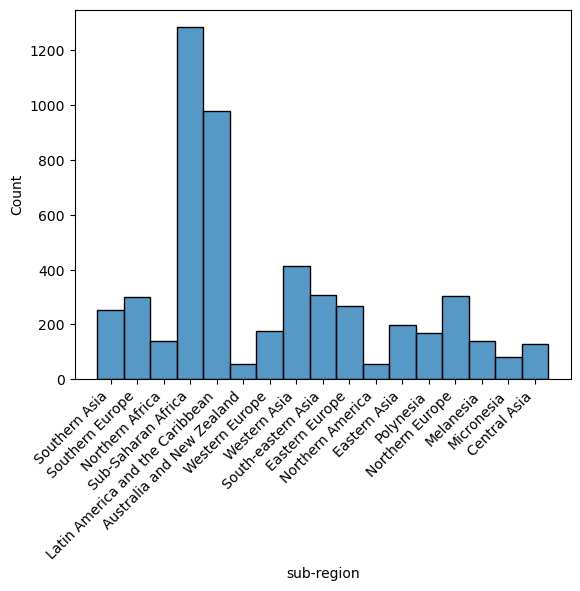

In [18]:
# check remaining region & sub-region distribution
subregion_hist = sns.histplot(data=df['sub-region'], discrete=True)
labels = subregion_hist.get_xticklabels()
subregion_hist.set_xticklabels(subregion_hist.get_xticklabels(), rotation=45, ha='right')
plt.show()